<a href="https://colab.research.google.com/github/inyong37/Study/blob/master/IV.%20COLAB/Enemy-Spotted/0.%20Colab/Tutorial%20/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to add channel dimension (needed for CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [2]:
# Build a simple CNN model
cnn_model = models.Sequential()

# Add convolutional layers
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add fully connected layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8385 - loss: 0.5113 - val_accuracy: 0.9756 - val_loss: 0.0826
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9805 - loss: 0.0617 - val_accuracy: 0.9853 - val_loss: 0.0511
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.9854 - val_loss: 0.0454
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9879 - val_loss: 0.0428
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9892 - val_loss: 0.0380


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


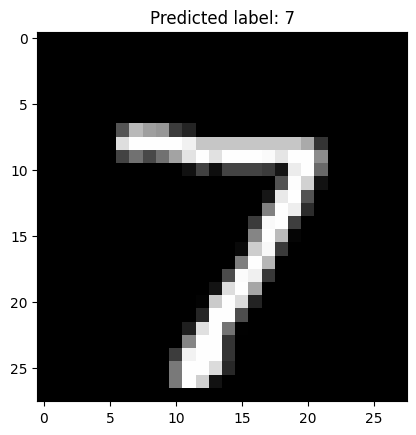

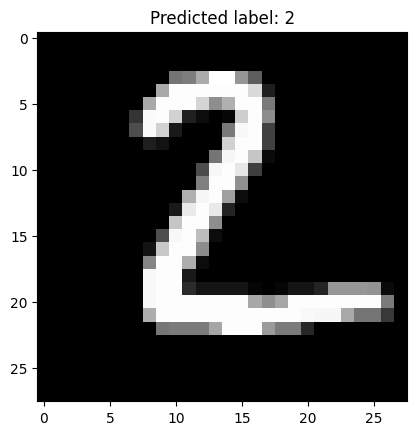

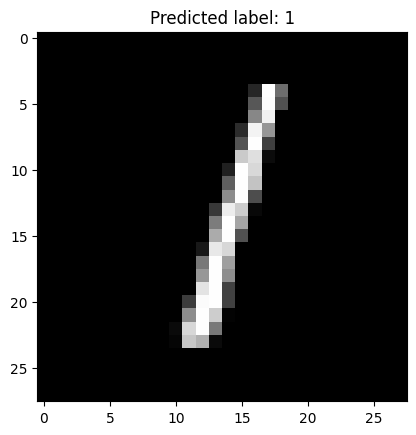

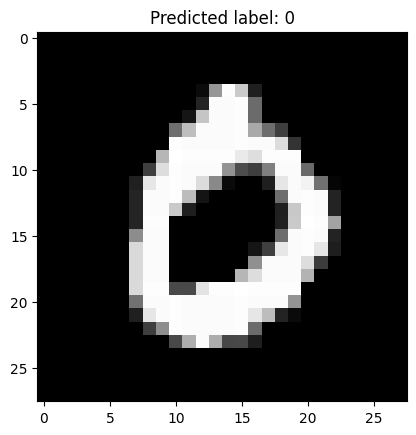

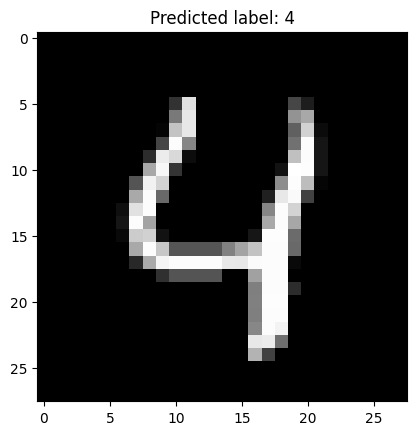

In [3]:
# Visualize a few test samples with their predictions
predictions = cnn_model.predict(x_test[:5])

# Plot test images and predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted label: {np.argmax(predictions[i])}")
    plt.show()
